<a href="https://colab.research.google.com/github/ergegananputra/learn_ai_mushroom_classification/blob/main/Kelompok_10_Mushroom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok 10**
dataset : https://archive.ics.uci.edu/dataset/73/mushroom
<br>
Anggota:
*   Adiel Boanerge Gananputra (22-500051-SV-21386)
*   List item



In [ ]:
!python --version

Python 3.10.12


In [ ]:
!pip install ucimlrepo

# Read the Dataset

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
df_X = mushroom.data.features
df_y = mushroom.data.targets

# metadata
print(mushroom.metadata)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [ ]:
# variable information
print(mushroom.variables)

                        name     role         type demographic  \
0                  poisonous   Target  Categorical        None   
1                  cap-shape  Feature  Categorical        None   
2                cap-surface  Feature  Categorical        None   
3                  cap-color  Feature       Binary        None   
4                    bruises  Feature  Categorical        None   
5                       odor  Feature  Categorical        None   
6            gill-attachment  Feature  Categorical        None   
7               gill-spacing  Feature  Categorical        None   
8                  gill-size  Feature  Categorical        None   
9                 gill-color  Feature  Categorical        None   
10               stalk-shape  Feature  Categorical        None   
11                stalk-root  Feature  Categorical        None   
12  stalk-surface-above-ring  Feature  Categorical        None   
13  stalk-surface-below-ring  Feature  Categorical        None   
14    stal

In [ ]:
print(df_X)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
...        ...         ...       ...     ...  ...             ...   
8119         k           s         n       f    n               a   
8120         x           s         n       f    n               a   
8121         f           s         n       f    n               a   
8122         k           y         n       f    y               f   
8123         x           s         n       f    n               a   

     gill-spacing gill-size gill-color stalk-shape  ...  \
0               c         n          k           e  ...   
1               c         b          k           e  .

In [ ]:
df_y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [ ]:
df_X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Check percentase target class

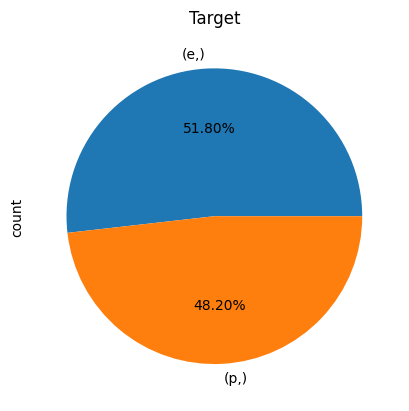

In [ ]:
import matplotlib.pyplot as plt

data = df_y.value_counts()

data.plot(kind='pie',autopct='%.2f%%')
plt.title("Target")
plt.show()

# Check Missing Value

In [ ]:
df_X.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [ ]:
df_y.isnull().sum()

poisonous    0
dtype: int64

In [ ]:
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.metrics import sensitivity_specificity_support
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

le = LabelEncoder()
df_y= le.fit_transform(df_y['poisonous'])

df_X = df_X.fillna(value={'stalk-root': 'unknown'}) # Fill Missing Value

cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X

array([[5., 2., 4., ..., 2., 3., 5.],
       [5., 2., 9., ..., 3., 2., 1.],
       [0., 2., 8., ..., 3., 2., 3.],
       ...,
       [2., 2., 4., ..., 0., 1., 2.],
       [3., 3., 4., ..., 7., 4., 2.],
       [5., 2., 4., ..., 4., 1., 2.]])

In [ ]:
y

array([1., 0., 0., ..., 0., 1., 0.])

In [ ]:
X_train

array([[ 1.03022822,  0.13973799, -1.76668189, ..., -1.09445396,
         0.28013546,  2.03247825],
       [ 1.03022822, -1.48677212, -0.5885256 , ..., -0.67522295,
         1.07299272, -0.87398302],
       [ 1.03022822, -1.48677212, -0.5885256 , ..., -1.09445396,
         0.28013546, -0.87398302],
       ...,
       [-0.85091425,  0.95299304, -0.19580684, ..., -0.25599193,
         1.07299272,  1.45118599],
       [-0.22386676,  0.13973799, -0.98124436, ...,  1.42093215,
         0.28013546,  1.45118599],
       [-0.22386676, -1.48677212, -0.5885256 , ...,  1.42093215,
        -1.30557906, -0.29269077]])

In [ ]:
X_test

array([[-0.85091425, -1.48677212, -0.19580684, ..., -0.25599193,
        -0.5127218 , -0.29269077],
       [-0.85091425,  0.13973799, -0.98124436, ...,  1.42093215,
         0.28013546,  0.28860148],
       [ 1.03022822,  0.95299304, -0.19580684, ...,  1.42093215,
         0.28013546,  0.28860148],
       ...,
       [ 1.03022822, -1.48677212, -0.5885256 , ..., -1.09445396,
         0.28013546, -0.87398302],
       [ 1.03022822,  0.95299304, -0.19580684, ..., -0.25599193,
        -0.5127218 ,  1.45118599],
       [ 1.03022822, -1.48677212, -0.5885256 , ..., -0.67522295,
         0.28013546, -0.87398302]])

In [ ]:
X_test[1]

array([-0.85091425,  0.13973799, -0.98124436, -0.84357543,  1.83768653,
        0.16573041, -0.43507579,  1.50281493, -1.35460433,  0.8676257 ,
        1.35202012,  0.68484555,  0.58918713,  0.10414406,  0.11288747,
        0.        ,  0.14284748, -0.25508565, -1.26604399,  1.42093215,
        0.28013546,  0.28860148])

# Logistic Regression

Accuracy  0.9569319114027892
Precision  0.9568107878095813
Recall  0.9570308053056988
Confusion matrix  [[1199   58]
 [  47 1134]]
F1  0.9569012759909348


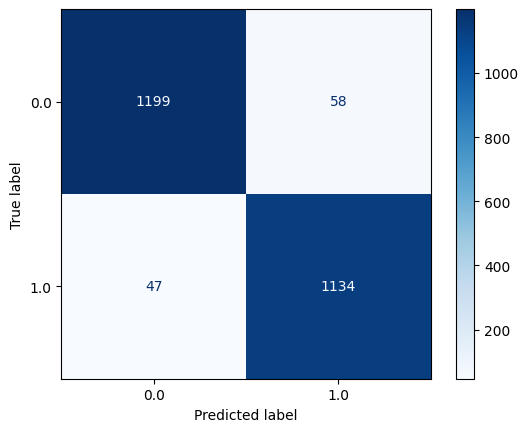

In [ ]:
# LOGISTIC REGRESSION

#mulai melakukan modelling. model ML learning/ belajar dari training set
import numpy as np

model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)
# y_pred jika di print out keluar vector prediksi nya

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

from sklearn.metrics import f1_score
print('F1 ',f1_score(y_test, y_pred, average='macro'))

In [ ]:
model.coef_

array([[ 0.01519835,  0.79814823,  0.01308409, -1.40713584, -1.61206627,
        -0.93555503, -5.3749039 ,  6.40499337, -0.68715965,  1.34868191,
        -6.38284857, -1.76448805, -0.12225266, -0.40102517,  0.04312987,
         0.        ,  1.07036609,  1.58444175, -1.85621457, -0.19805435,
        -2.41433956, -0.10452807]])

In [ ]:
model.intercept_

array([-1.23724503])

# K nearest neighbour

Accuracy  0.9987694831829368
Precision  0.9988095238095238
Recall  0.9987298899237934
Confusion matrix  [[1257    0]
 [   3 1178]]


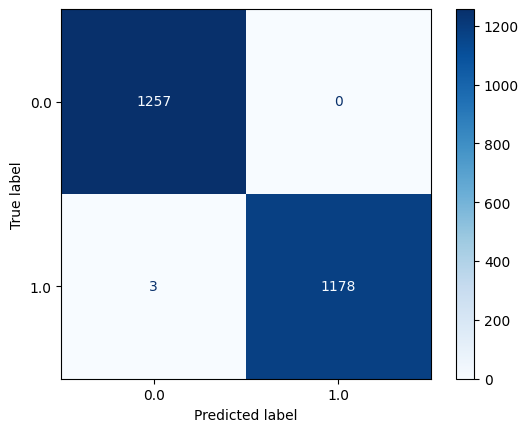

In [ ]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

# Random Forest

Accuracy  1.0
Precision  1.0
Recall  1.0
Confusion matrix  [[1257    0]
 [   0 1181]]


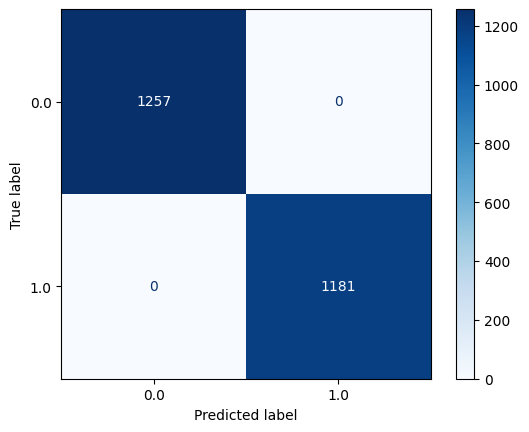

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)

# AdaBoost

Accuracy  1.0
Precision  1.0
Recall  1.0
Confusion matrix  [[1257    0]
 [   0 1181]]


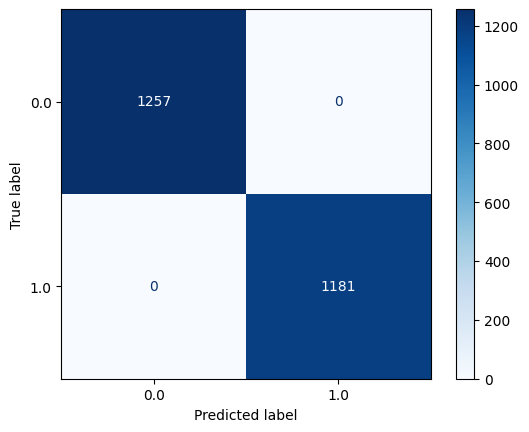

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))
print('Precision ',precision_score(y_test, y_pred, average='macro'))
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred))
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
# plt.show()
disp.plot(cmap=plt.cm.Blues)